<body>
    <h1>Lista di Compiti</h1>
    <ul class="task-list">
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Il livello delle insegnante al mese</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Mettere in un archivio solo per l'algoritmo</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Adattare l'algoritmo</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Pensare su come renderlo riusabile</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Scaricare le immagini</label>
        </li>
        <li class="task-item">
            <input type="checkbox" id="task1">
            <label for="task1">Riportare tutto da questo quaderno e creare la copertina e i testi</label>
        </li>
    </ul>
</body>

In [57]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#from memoria import guida as gd

In [58]:
df = pd.read_csv('Lezioni.csv')
df = df.drop(columns='Unnamed: 0', axis=1)
df.head(5)

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023


- Dividiamo i dati

In [59]:
df1 = df[(df['Mese'] == 'Giugno') | (df['Mese'] == 'Luglio') | (df['Mese'] == 'Agosto') | (df['Mese'] == 'Settembre') | (df['Mese'] == 'Ottobre')]
df2 = df[(df['Mese'] == 'Novembre') | (df['Mese'] == 'Dicembre') | (df['Mese'] == 'Gennaio') | (df['Mese'] == 'Febbraio')]


# Prime metriche

In [60]:
def differenza_giorni(dataframe):
    le_date = dataframe['Data']
    data = []
    
    for x in le_date:
        x = str(x)
        data.append(x[0:10])
    
    # Conversione delle stringhe in oggetti datetime
    oggetti_data = [datetime.strptime(data, "%Y-%m-%d") for data in data]
    differenze = []

    # Calcolo delle differenze in giorni
    for i in range(len(oggetti_data)-1):
        delta = oggetti_data[i+1] - oggetti_data[i]
        differenze.append(delta.days)
    
    differenza = round((sum(differenze)/len(differenze)), 1)
    testo = f'La media della differenza dei giorni tra le lezioni: {differenza} giorni. (Massimo: {max(differenze)})'
    
    maggiori_differenze = differenze
    maggiori_differenze = [int(valore) for valore in maggiori_differenze]
    #maggiori_differenze = list(set(maggiori_differenze))
    maggiori_differenze.sort(reverse=True)

    return differenza, testo, maggiori_differenze[:-1]

### DF1 - Fino ad Ottobre

- Le quantità

In [61]:
quantita, _ = df1.shape # Di lezioni
densita = round((quantita / ((df1.Mese.nunique()) * 30)), 2) # Densità
percentuale = round((densita * 100), 1) # Percentuale

print(f'Ci sono state {quantita} ore di lezioni durante più o meno {(df1.Mese.nunique()) * 30} giorni.')
print(f'La densità di lezioni al giorno {round(densita, 1)}')
print(f'La percentuale di lezioni che copre il periodo è {percentuale}%')
print(differenza_giorni(df1)[1])

from collections import Counter
conteggio = Counter(differenza_giorni(df1)[2])

for numero, ripetizioni in conteggio.items():
    print(f'{numero} -> {ripetizioni}')

Ci sono state 143 ore di lezioni durante più o meno 150 giorni.
La densità di lezioni al giorno 0.9
La percentuale di lezioni che copre il periodo è 95.0%
La media della differenza dei giorni tra le lezioni: 1.1 giorni. (Massimo: 7)
7 -> 1
5 -> 1
4 -> 4
3 -> 18
2 -> 5
1 -> 60
0 -> 52


### DF2 - Fino a Febbraio

- Le quantità

In [62]:
quantita, _ = df2.shape # Di lezioni
densita = round((quantita / ((df2.Mese.nunique()) * 30)), 2) # Densità
percentuale = round((densita * 100), 1) # Percentuale

print(f'Ci sono state {quantita} ore di lezioni durante più o meno {(df2.Mese.nunique()) * 30} giorni.')
print(f'La densità di lezioni al giorno {round(densita, 1)}')
print(f'La percentuale di lezioni che copre il periodo è {percentuale}%')
print(differenza_giorni(df2)[1])

conteggio = Counter(differenza_giorni(df2)[2])

for numero, ripetizioni in conteggio.items():
    print(f'{numero} -> {ripetizioni}')

Ci sono state 51 ore di lezioni durante più o meno 120 giorni.
La densità di lezioni al giorno 0.4
La percentuale di lezioni che copre il periodo è 42.0%
La media della differenza dei giorni tra le lezioni: 2.3 giorni. (Massimo: 12)
12 -> 1
8 -> 1
7 -> 1
6 -> 2
5 -> 2
4 -> 7
3 -> 4
2 -> 3
1 -> 22
0 -> 6


### Per entrambi i dati

- Distribuzione delle ore

In [63]:
df1.Ora.value_counts()

Ora
7     54
11    27
10    25
9     17
8     16
13     2
12     2
Name: count, dtype: int64

In [64]:
df2.Ora.value_counts()

Ora
7     24
10    11
8      6
9      5
11     2
13     2
17     1
Name: count, dtype: int64

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



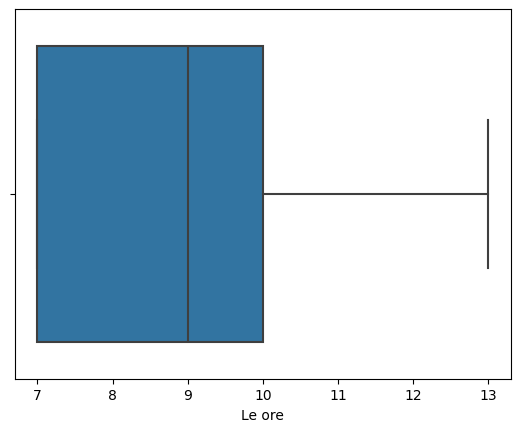

c:\Users\Soldado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_core.py:1218: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



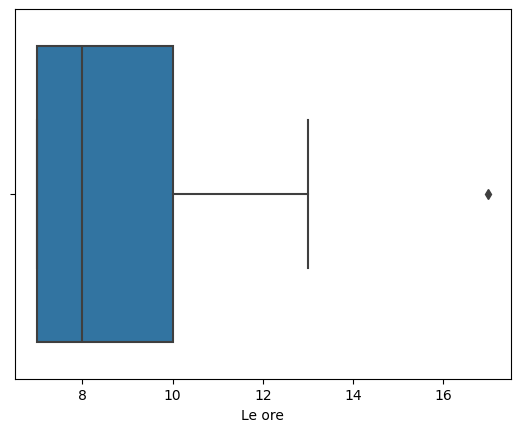

In [65]:
sns.boxplot(x=df1.Ora.tolist())
plt.xlabel('Le ore')
plt.show()
sns.boxplot(x=df2.Ora.tolist())
plt.xlabel('Le ore')
plt.show()

# Grafico di linea dei mesi

Media dell'orario, densità di lezioni, la distanza massima tra una lezione e l'altra

In [66]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio']

In [67]:
tutti_i_mesi = df1.Mese.unique().tolist()

In [68]:
def plot_grafico(dizionari, nome):
    x = list(dizionari.keys())
    y1 = list(dizionari.values())

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name='f', line=dict(color='lightseagreen')))

    fig.update_layout(title=nome,
                      xaxis_title='Mesi',
                      yaxis_title='Valori')

    fig.show()

### Media degli orari e le percentuali

In [69]:
orari = (df1.groupby('Mese')['Ora'].mean()).round().to_dict()
percentuali = ((df1.groupby('Mese')['Index'].count() / 30) * 100).round().to_dict()

In [70]:
orari = {k: v for k, v in sorted(orari.items(), key=lambda item: months_order.index(item[0]))}
percentuali = {k: v for k, v in sorted(percentuali.items(), key=lambda item: months_order.index(item[0]))}

### Distanza tra le lezioni

In [71]:
def differenza(data): # Lista con le date
    oggetti_data = [datetime.strptime(data, "%Y-%m-%d") for data in data]
    differenze = []

    for i in range(len(oggetti_data)-1):
        delta = oggetti_data[i+1] - oggetti_data[i]
        differenze.append(delta.days)
    return differenze

In [72]:
dizionario_differenza_media = {}
dizionario_differenza_max = {}

In [73]:
for x in tutti_i_mesi:
    dfx = df1[df1['Mese'] == x]
    valori = differenza(dfx.Data.to_list())
    
    dizionario_differenza_media[x] = round((sum(valori) / len(valori)), 2)
    dizionario_differenza_max[x] = max(valori)

In [74]:
dizionario_differenza_media

{'Giugno': 0.94,
 'Luglio': 1.22,
 'Agosto': 0.94,
 'Settembre': 1.22,
 'Ottobre': 1.0}

In [75]:
plot_grafico(dizionario_differenza_media, 'Media della differenza di giorni tra le lezioni')

In [76]:
plot_grafico(orari, 'Media degli orari per mese')

In [77]:
plot_grafico(percentuali, 'Percentuale di lezioni al mese')

In [78]:
dizionario_differenza_max

{'Giugno': 7, 'Luglio': 4, 'Agosto': 4, 'Settembre': 4, 'Ottobre': 5}

In [79]:
orari

{'Giugno': 9.0, 'Luglio': 8.0, 'Agosto': 9.0, 'Settembre': 9.0, 'Ottobre': 8.0}

In [80]:
percentuali

{'Giugno': 107.0,
 'Luglio': 80.0,
 'Agosto': 110.0,
 'Settembre': 80.0,
 'Ottobre': 100.0}

# Le insegnanti nel meriodo

In [81]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio']

- Prime cinque insegnate del periodo

In [82]:
insegnati_dizionario = df1.Professoressa.value_counts().to_dict()
#insegnati_piu_di_dieci = {k: v for k, v in insegnati_dizionario.items() if v > 9}
from itertools import islice
insegnati_dizionario = dict(islice(insegnati_dizionario.items(), 5))
insegnanti_del_periodo = list(insegnati_dizionario.keys())

In [83]:
insegnanti_del_periodo

['Federica', 'Lorella', 'Anna', 'Sabina', 'Francesca 2']

### Percentuale dei livelli ad ogni mese

In [84]:
tutti_i_mesi = df1.Mese.unique().tolist()
livello_totale = []

for x in tutti_i_mesi:
    livelli = ['B1', 'B2', 'C1']
    percentuale_per_livello = []
    dfz = df1[df1['Mese'] == x]
    quantita, _ = dfz.shape

    for i in livelli:
        dfx, _ = dfz[dfz['Livello'] == i].shape
        percentuale = int(round(((dfx / quantita) * 100), 0))
        percentuale_per_livello.append(percentuale)

    lista = [x, percentuale_per_livello[0], percentuale_per_livello[1], percentuale_per_livello[2]]
    livello_totale.append(lista)

In [85]:
punteggi_dei_livelli = []

In [86]:
for x in livello_totale:
    posizione = [0, x[1], x[2], x[3]]
    posizione = posizione.index(max(posizione))
    punteggi_dei_livelli.append(posizione)
    print(f'{x[0]} --> B1: {x[1]}% -- B2: {x[2]}% -- C1: {x[3]}%')

Giugno --> B1: 47% -- B2: 25% -- C1: 28%
Luglio --> B1: 58% -- B2: 29% -- C1: 12%
Agosto --> B1: 24% -- B2: 42% -- C1: 33%
Settembre --> B1: 21% -- B2: 33% -- C1: 46%
Ottobre --> B1: 7% -- B2: 43% -- C1: 50%


In [87]:
punteggio_del_periodo = sum(punteggi_dei_livelli) / len(punteggi_dei_livelli)

### Livello di ogni professoressa per mese

In [88]:
insegnanti_del_periodo

['Federica', 'Lorella', 'Anna', 'Sabina', 'Francesca 2']

In [89]:
data = {'Professoressa': ['Laura', 'Anna', 'Federica', 'Anna', 'Anna', 'Laura'],
        'Livello': ['C1', 'B1', 'C1', 'C1', 'C1', 'B2'],
        'Mese': ['Aprile', 'Aprile', 'Giugno', 'Aprile', 'Aprile', 'Luglio']}

data = pd.DataFrame(data)

In [90]:
# Calcoliamo le percentuali per ogni livello
df['count'] = 1
pivot_df = df.pivot_table(index=['Professoressa', 'Mese'], columns='Livello', values='count', aggfunc='sum', fill_value=0)
pivot_df = round(pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100)

# Creiamo il nuovo DataFrame con le percentuali dei livelli
data2 = {
    'Professoressa': pivot_df.index.get_level_values(0),
    'Mese': pivot_df.index.get_level_values(1),
    'Percentuale del Livello B1': pivot_df['B1'].values,
    'Percentuale del Livello B2': pivot_df['B2'].values,
    'Percentuale del Livello C1': pivot_df['C1'].values
}

new_df = pd.DataFrame(data2)

new_df.groupby(['Professoressa', 'Mese']).sum()

Percentuale del Livello B1  \
Professoressa Mese                                    
Alice         Agosto                            0.0   
              Febbraio                          0.0   
              Maggio                          100.0   
Anna          Agosto                           25.0   
              Dicembre                          0.0   
...                                             ...   
Sofia         Luglio                          100.0   
              Novembre                          0.0   
              Settembre                         0.0   
Virginia      Maggio                          100.0   
              Ottobre                           0.0   

                         Percentuale del Livello B2  \
Professoressa Mese                                    
Alice         Agosto                            0.0   
              Febbraio                          0.0   
              Maggio                            0.0   
Anna          Agosto                           25.0   
              Dicembre                        100.0   
...                                             ...   
Sofia         Luglio                            0.0   
              Novembre                          0.0   
              Settembre                       100.0   
Virginia      Maggio                            0.0   
              Ottobre                         100.0   

                         Percentuale del Livello C1  
Professoressa Mese                                   
Alice         Agosto                          100.0  
              Febbraio                        100.0  
              Maggio                            0.0  
Anna          Agosto                           50.0  
              Dicembre                          0.0  
...                                             ...  
Sofia         Luglio                            0.0  
              Novembre                        100.0  
              Settembre                         0.0  
Virginia      Maggio                            0.0  
              Ottobre                           0.0  

[118 rows x 3 columns]

In [91]:
data = df1[['Professoressa', 'Livello', 'Mese']]

# Calcolo delle frequenze dei livelli per ogni professoressa
pivot_table = pd.pivot_table(data, index=['Professoressa', 'Mese'], columns='Livello', aggfunc=len, fill_value=0)

# Calcolo delle percentuali
percentuali_df = round((pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100), 1)

# Resettiamo l'indice per ottenere un dataframe piatto
percentuali_df = percentuali_df.reset_index()

# Rinominiamo le colonne per soddisfare il formato richiesto
percentuali_df.columns.name = None
percentuali_df.columns = ['Professoressa', 'Mese', 'Percentuale del Livello B1', 'Percentuale del Livello B2', 'Percentuale del Livello C1']

percentuali_df = percentuali_df[percentuali_df['Professoressa'] == 'Federica']

In [119]:
def percentuale_livello_insegnante(professoressa:str):
    data = df1[['Professoressa', 'Livello', 'Mese']]
    lezioni_totali = df.groupby('Professoressa').size().reset_index(name='Totale di Lezioni')

    # Calcolo delle frequenze dei livelli per ogni professoressa
    pivot_table = pd.pivot_table(data, index=['Professoressa', 'Mese'], columns='Livello', aggfunc=len, fill_value=0)
    
    # Calcolo delle percentuali
    percentuali_df = round((pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100), 1)

    # Resettiamo l'indice per ottenere un dataframe piatto
    percentuali_df = percentuali_df.reset_index()

    # Rinominiamo le colonne per soddisfare il formato richiesto
    percentuali_df.columns.name = None
    percentuali_df.columns = ['Professoressa', 'Mese', 'Percentuale B1', 'Percentuale B2', 'Percentuale C1']

    #percentuali_df = pd.merge(percentuali_df.reset_index(), lezioni_totali, on='Professoressa')
    #lezioni_totali = pd.merge(percentuali.reset_index(), lezioni_totali, on='Professoressa')

    if professoressa != '':
        percentuali_df = percentuali_df[percentuali_df['Professoressa'] == professoressa]
        return percentuali_df
    else:
        return percentuali_df
    
percentuale_livello_insegnante('Lorella')

,Professoressa,Mese,Percentuale B1,Percentuale B2,Percentuale C1
49,Lorella,Agosto,40.0,20.0,40.0
50,Lorella,Luglio,50.0,25.0,25.0
51,Lorella,Ottobre,0.0,33.3,66.7
52,Lorella,Settembre,0.0,0.0,100.0


### Bozze

In [93]:
data = {'Professoressa': ['Anna', 'Federica', 'Anna', 'Anna', 'Laura'],
        'Livello': ['B1', 'C1', 'C1', 'C1', 'B2'],
        'Mese': ['Aprile', 'Giugno', 'Aprile', 'Aprile', 'Luglio']}

data = pd.DataFrame(data)

lezioni_per_mese = data.groupby(['Professoressa', 'Livello', 'Mese']).size().reset_index(name='Numero di Lezioni')
lezioni_per_mese


,Professoressa,Livello,Mese,Numero di Lezioni
0,Anna,B1,Aprile,1
1,Anna,C1,Aprile,2
2,Federica,C1,Giugno,1
3,Laura,B2,Luglio,1


In [94]:
insegnanti_del_periodo_df = df2[(df2['Professoressa'] == 'Federica') | (df2['Professoressa'] == 'Lorella') |
                                (df2['Professoressa'] == 'Anna') | (df2['Professoressa'] == 'Sabina') | 
                                (df2['Professoressa'] == 'Francesca 2') ]

In [95]:
insegnanti_del_periodo_df = df2[['Livello', 'Professoressa', 'Mese', 'Index']]
insegnanti_del_periodo_df = insegnanti_del_periodo_df.groupby(['Professoressa', 'Mese', 'Livello']).count().head(5)#.to_dict()

In [96]:
insegnanti_del_periodo_df

Index
Professoressa Mese     Livello       
Alice         Febbraio C1           1
Anna          Dicembre B2           1
              Gennaio  C1           2
Asia          Gennaio  C1           1
              Novembre B2           1

In [97]:
insegnanti_del_periodo_df = insegnanti_del_periodo_df.to_dict()
insegnanti_del_periodo_df

{'Index': {('Alice', 'Febbraio', 'C1'): 1,
  ('Anna', 'Dicembre', 'B2'): 1,
  ('Anna', 'Gennaio', 'C1'): 2,
  ('Asia', 'Gennaio', 'C1'): 1,
  ('Asia', 'Novembre', 'B2'): 1}}

In [98]:
resultato = [[key[0], key[1], key[2], value] for key, value in insegnanti_del_periodo_df['Index'].items()]
print(resultato)

[['Alice', 'Febbraio', 'C1', 1], ['Anna', 'Dicembre', 'B2', 1], ['Anna', 'Gennaio', 'C1', 2], ['Asia', 'Gennaio', 'C1', 1], ['Asia', 'Novembre', 'B2', 1]]


In [99]:
# Creare un dizionario per tenere traccia del massimo valore per ogni persona e mese
max_values = {}
result = []

for person, month, category, value in resultato:
    key = (person, month)
    if key not in max_values or value > max_values[key]:
        max_values[key] = value

# Creare la lista finale con il mese in cui ogni persona ha ottenuto il massimo valore
for (person, month), max_value in max_values.items():
    result.append([person, month, category, max_value])

print(result)

[['Alice', 'Febbraio', 'B2', 1], ['Anna', 'Dicembre', 'B2', 1], ['Anna', 'Gennaio', 'B2', 2], ['Asia', 'Gennaio', 'B2', 1], ['Asia', 'Novembre', 'B2', 1]]


In [100]:
for x in insegnanti_del_periodo:
    lista = []
    for i in result:
        if i[0] == x:
            lista.append(x)

In [101]:
insegnanti_dizionario = {}

### Quantità di lezioni ad ogni mese di una professoressa

In [102]:
def calcola_differenza(professoressa):
    insegnante = df[df['Professoressa'] == professoressa]
    insegnante = (insegnante.groupby('Mese')['Index'].count()).round()
    insegnante = insegnante.to_dict()

    #months_order = ['Gennaio', 'Febbraio', 'Marzo', 'Aprile', 'Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre', 'Novembre', 'Dicembre']

    mesi = list(insegnante.keys())
    differenza = list(set(months_order) - set(mesi))

    if len(differenza) > 0:
        for x in differenza:
            insegnante[x] = 0

    insegnante = {k: v for k, v in sorted(insegnante.items(), key=lambda item: months_order.index(item[0]))}
    
    return insegnante

In [103]:
calcola_differenza(insegnanti_del_periodo[0])

{'Maggio': 0,
 'Giugno': 0,
 'Luglio': 6,
 'Agosto': 10,
 'Settembre': 0,
 'Ottobre': 4,
 'Novembre': 3,
 'Dicembre': 3,
 'Gennaio': 1,
 'Febbraio': 0}

In [104]:
# Dati per le due linee
x = months_order
y1 = list(calcola_differenza(insegnanti_del_periodo[0]).values())
y2 = list(calcola_differenza(insegnanti_del_periodo[1]).values()) 
y3 = list(calcola_differenza(insegnanti_del_periodo[2]).values()) 
y4 = list(calcola_differenza(insegnanti_del_periodo[3]).values()) 
y5 = list(calcola_differenza(insegnanti_del_periodo[4]).values())

# Creare il grafico di linea con due linee
fig = go.Figure()

# Aggiungere la prima linea con colore blu
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines+markers', name=insegnanti_del_periodo[0], line=dict(color='green')))
fig.add_trace(go.Scatter(x=x, y=y2, mode='lines+markers', name=insegnanti_del_periodo[1], line=dict(color='red')))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines+markers', name=insegnanti_del_periodo[2], line=dict(color='lightseagreen')))
fig.add_trace(go.Scatter(x=x, y=y4, mode='lines+markers', name=insegnanti_del_periodo[3], line=dict(color='orange')))
fig.add_trace(go.Scatter(x=x, y=y5, mode='lines+markers', name=insegnanti_del_periodo[4], line=dict(color='blue')))

# Aggiungere etichette e titoli
fig.update_layout(title='Grafico dei livelli',
                  xaxis_title='Mesi',
                  yaxis_title='Valori')

# Mostrare il grafico
fig.show()

In [105]:
percentuale_livello_insegnante('Lorella')

,Professoressa,Mese,Percentuale B1,Percentuale B2,Percentuale C1
49,Lorella,Agosto,40.0,20.0,40.0
50,Lorella,Luglio,50.0,25.0,25.0
51,Lorella,Ottobre,0.0,33.3,66.7
52,Lorella,Settembre,0.0,0.0,100.0


# Le caratteristiche

In [106]:
sum(list(dizionario_differenza_media.values()))

5.32

In [107]:
dizionario_differenza_media

{'Giugno': 0.94,
 'Luglio': 1.22,
 'Agosto': 0.94,
 'Settembre': 1.22,
 'Ottobre': 1.0}

In [108]:
import plotly.graph_objects as go

def valore(dizionario:dict):
    return round((sum(list(dizionario.values())) / len(list(dizionario.values()))), 1)

df = pd.DataFrame(dict(
categorie = ["Percentuale", "Orari", "Distanza", "Distanza massima", "Livelli"],
periodo = [float(list(str(valore(percentuali)))[0]), valore(orari), 
           valore(dizionario_differenza_media), max(dizionario_differenza_max.values()), 
           punteggio_del_periodo]))
df

,categorie,periodo
0,Percentuale,9.0
1,Orari,8.6
2,Distanza,1.1
3,Distanza massima,7.0
4,Livelli,2.0


In [109]:
fig = go.Figure()

def aggiungi_traccia(fig, df, colonna):
    fig.add_trace(go.Scatterpolar(
        r = df[colonna],
        theta = df["categorie"],
        fill = "toself",
        name = "Janeiro",
        line = dict(color = "#63A644"),
        fillcolor = "#63A644",
        opacity = 0.2
    ))

for x in df.columns[1:].to_list():
    aggiungi_traccia(fig, df, x)

fig.show()
#import plotly.io as pio
#pio.write_image(fig, 'grafico.png')